# PSO Fitting Testing

In [45]:
from pulse2percept.models import BiphasicAxonMapModel, AxonMapModel
from pulse2percept.model_selection import ParticleSwarmOptimizer
from pulse2percept.implants import ArgusII
import shapes

import matplotlib.pyplot as plt
import numpy as np

## Do 12-005 S2

In [47]:
s2 = shapes.subject_params['12-005']
implant, model = shapes.model_from_params(s2)
model.xystep=0.5

# CHANGING relative_weight will be VERY important
relative_weight=1e-5
estimator = shapes.BiphasicAxonMapEstimator(implant=implant, model=model, relative_weight=relative_weight)
search_params = {
    'a5' : (-100, 100),
    'a6': (-100, 100),
    'rho': (10, 1000),
    'axlambda': (10, 2000)
}
# search_params = {
#     'rho': (10, 300),
#     'axlambda': (10, 500)
# }
opt = ParticleSwarmOptimizer(estimator, search_params, max_iter=100, swarm_size=40, has_loss_function=True)

data = shapes.load_shapes("../data/shapes.h5", subjects=['12-005'], stim_class='SingleElectrode')
x = data[['amp1', 'freq', 'pdur', 'electrode1']]
y = data['image']


In [48]:
estimator.score(x, y)
opt.fit(x, y)

rho=200.000000, axlambda=200.000000, a5=1.081200, a6=-0.353380, score=7.165556
rho=366.047515, axlambda=627.589400, a5=-87.009129, a6=-87.839631, score=3.908698
rho=920.500580, axlambda=1343.142897, a5=65.481918, a6=-98.342289, score=186786.516033
rho=387.488504, axlambda=1310.920413, a5=-48.388549, a6=88.157427, score=60661.832413
rho=375.768233, axlambda=1156.647175, a5=35.649826, a6=-34.381308, score=167313.883685
rho=835.282803, axlambda=102.678261, a5=89.459307, a6=-77.714852, score=384349.068102
rho=277.999802, axlambda=1340.764912, a5=55.580162, a6=82.222879, score=382501.931806
rho=543.824738, axlambda=1649.486644, a5=-28.675560, a6=6.133494, score=3.527943
rho=801.271976, axlambda=272.198169, a5=87.377238, a6=-68.570787, score=384349.068102
rho=132.197230, axlambda=486.497045, a5=75.026235, a6=-62.815781, score=35922.606943
rho=466.604132, axlambda=1406.669656, a5=-54.664284, a6=-19.940066, score=3.574462
rho=152.830788, axlambda=170.037228, a5=-6.176486, a6=-88.002375, score=

KeyboardInterrupt: 

In [ ]:
params1

In [ ]:
import random
from pulse2percept.utils import center_image
from skimage import measure
fig, axes = plt.subplots(10, 2, figsize=(20, 40))
preds = estimator.predict(x)
for plt_idx, img_idx in enumerate(random.sample([i for i in range(len(x))], 10)):
    axes[plt_idx, 0].imshow(center_image(preds[img_idx] > 1), cmap="gray")
    props = measure.regionprops(measure.label(center_image(preds[img_idx] > 1)))
    axes[plt_idx, 0].set_title("Predicted. Area:%.2f, Ecc:%.2f" % (props[0].area, props[0].eccentricity))
    axes[plt_idx, 1].imshow(center_image(y[img_idx]), cmap='gray')
    props = measure.regionprops(measure.label(center_image(y[img_idx])))
    prop = max(props, key = lambda x : x.area)
    axes[plt_idx, 1].set_title("Actual. Area:%.2f, Ecc:%.2f" % (prop.area, prop.eccentricity))
fig.show()

### New relative weight

In [49]:
model.size_model(20, 1, 0.45)

0.7235124302788845

In [24]:
s2 = shapes.subject_params['12-005']
implant, model = shapes.model_from_params(s2)
model.xystep=0.5

# CHANGING relative_weight will be very important
estimator = shapes.BiphasicAxonMapEstimator(implant=implant, model=model, relative_weight=1e-3)
search_params = {
    'a5' : (-10, 10),
    'a6': (-10, 10),
    'rho': (10, 300),
    'axlambda': (10, 500)
}
# search_params = {
#     'rho': (10, 300),
#     'axlambda': (10, 500)
# }
opt = ParticleSwarmOptimizer(estimator, search_params, max_iter=100, swarm_size=40, has_loss_function=True)

In [25]:
estimator.score(x, y)
opt.fit(x, y)

rho=200.000000, axlambda=200.000000, a5=1.081200, a6=-0.353380, score=693.508954
rho=119.405015, axlambda=290.160659, a5=-8.649741, a6=8.138974, score=4.449643
rho=268.360425, axlambda=291.994725, a5=-8.675122, a6=-2.844592, score=4.446453
rho=214.634367, axlambda=53.756793, a5=9.574124, a6=8.458668, score=24795.643257
rho=288.550622, axlambda=384.022614, a5=-0.921475, a6=-9.714843, score=4.269401
rho=280.542000, axlambda=15.847194, a5=2.986445, a6=-5.845247, score=478.808383
rho=286.562400, axlambda=136.919117, a5=-8.408391, a6=1.512653, score=4.911887
rho=58.736304, axlambda=239.650781, a5=2.324339, a6=6.731801, score=27.766219
rho=208.928120, axlambda=42.480946, a5=-5.932344, a6=0.040051, score=5.301103
rho=156.795653, axlambda=127.928806, a5=1.799180, a6=0.873852, score=200.060091
rho=69.776822, axlambda=155.988823, a5=8.810395, a6=7.432929, score=251.096003
rho=279.694531, axlambda=150.255523, a5=2.758443, a6=-5.615327, score=477.415187
rho=37.327878, axlambda=433.272740, a5=3.003

ParticleSwarmOptimizer(estimator=BiphasicAxonMapEstimator, 
                       has_loss_function=True, 
                       max_iter=100, min_func=0.01, 
                       min_step=0.01, search_params=dict, 
                       swarm_size=40, verbose=False)

In [28]:
params2 = estimator.get_params()

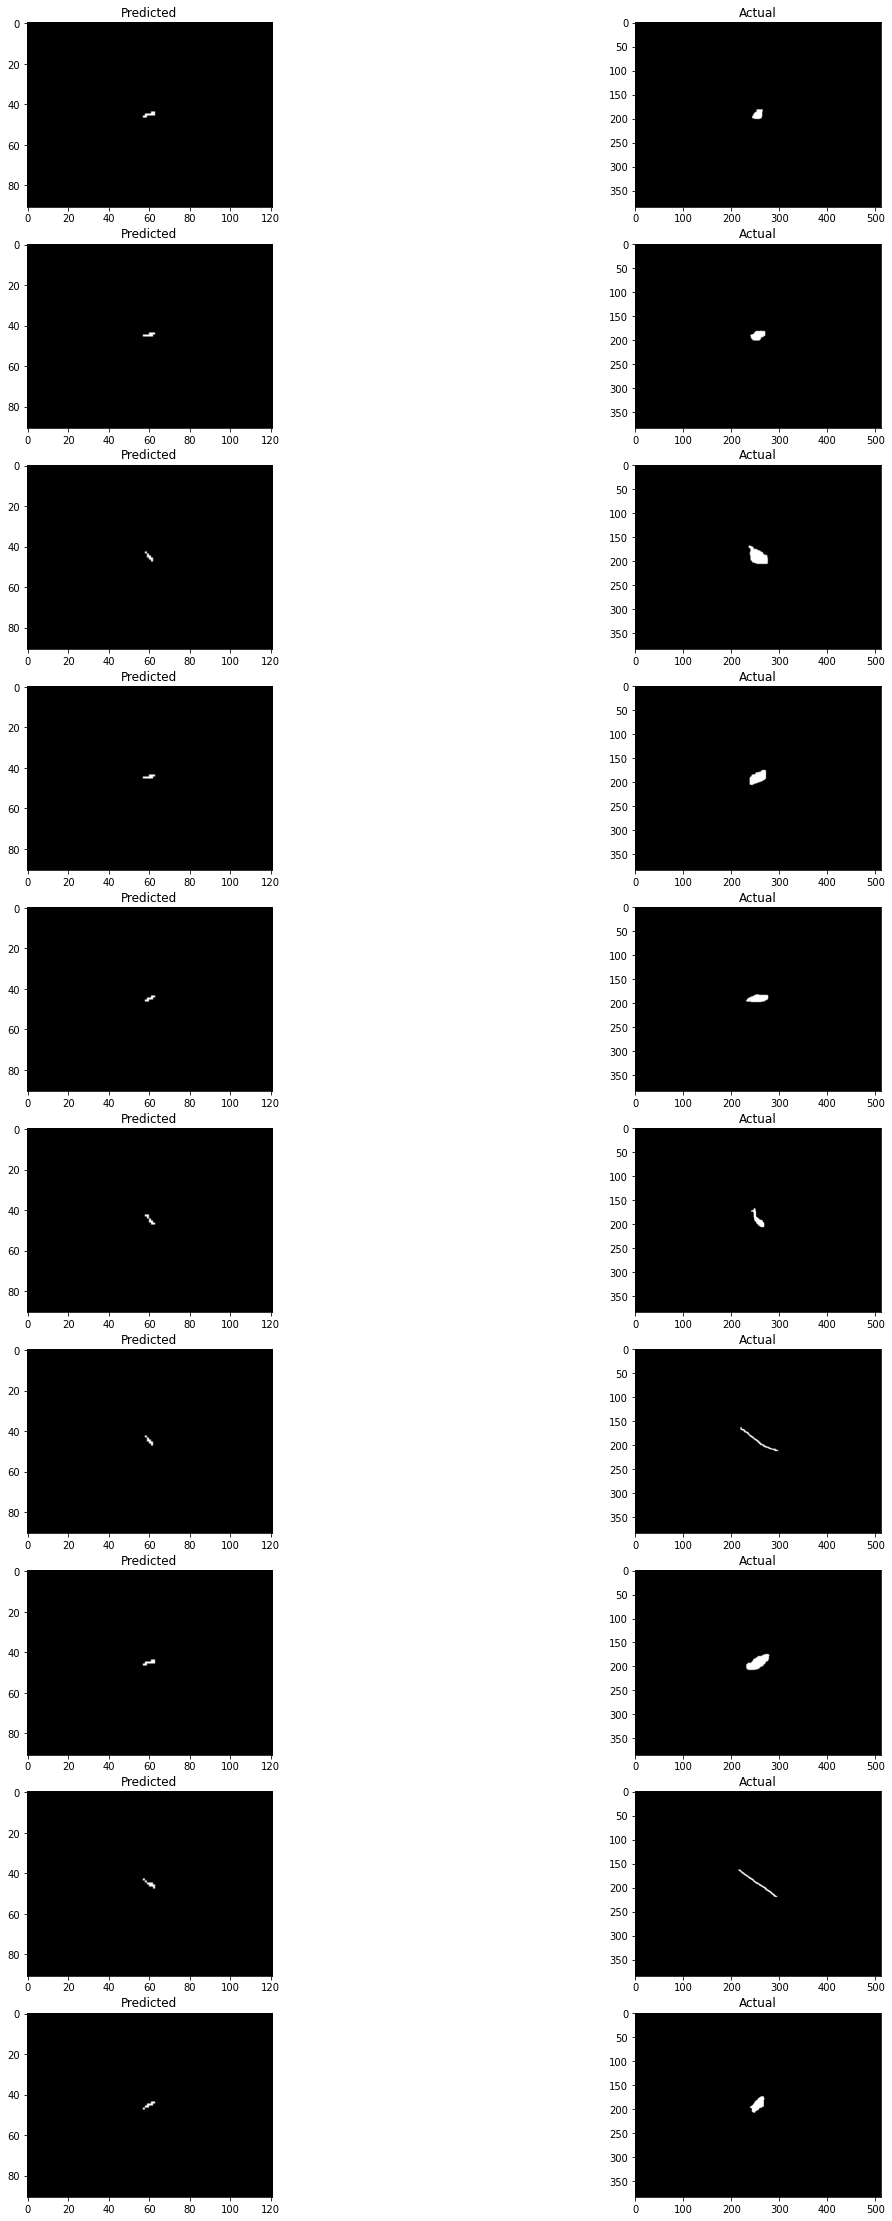

In [26]:
import random
from pulse2percept.utils import center_image
fig, axes = plt.subplots(10, 2, figsize=(20, 40))
preds = estimator.predict(x)
for plt_idx, img_idx in enumerate(random.sample([i for i in range(len(x))], 10)):
    axes[plt_idx, 0].imshow(center_image(preds[img_idx] > 1), cmap="gray")
    axes[plt_idx, 0].set_title("Predicted")
    axes[plt_idx, 1].imshow(center_image(y[img_idx]), cmap='gray')
    axes[plt_idx, 1].set_title("Actual")
fig.show()

In [38]:
s2 = shapes.subject_params['12-005']
implant, model = shapes.model_from_params(s2)
model.xystep=0.5

# CHANGING relative_weight will be very important
estimator = shapes.BiphasicAxonMapEstimator(implant=implant, model=model, relative_weight=1e-1)
search_params = {
    'a5' : (-10, 10),
    'a6': (-10, 10),
    'rho': (10, 300),
    'axlambda': (10, 500)
}
# search_params = {
#     'rho': (10, 300),
#     'axlambda': (10, 500)
# }
opt = ParticleSwarmOptimizer(estimator, search_params, max_iter=100, swarm_size=40, has_loss_function=True)

In [39]:
estimator.score(x, y)
opt.fit(x, y)

rho=200.000000, axlambda=200.000000, a5=1.081200, a6=-0.353380, score=69327.848682
rho=193.577593, axlambda=47.677672, a5=4.256859, a6=6.567921, score=5326.962234
rho=38.017653, axlambda=218.617322, a5=8.910464, a6=8.488114, score=24.807352
rho=40.558917, axlambda=56.590347, a5=3.803893, a6=-8.757717, score=4.897108
rho=101.919522, axlambda=449.096874, a5=-9.222855, a6=6.334293, score=4.193235
rho=205.181154, axlambda=397.760362, a5=7.001592, a6=8.553083, score=15534.331570
rho=60.819996, axlambda=213.011714, a5=2.049065, a6=-7.799924, score=4.347842
rho=102.038645, axlambda=374.602323, a5=5.387349, a6=8.979625, score=887.219739
rho=229.441370, axlambda=294.347363, a5=9.513505, a6=-1.404633, score=15129.164199
rho=139.337279, axlambda=286.959204, a5=-2.082693, a6=-4.703043, score=4.452995
rho=99.210210, axlambda=485.697010, a5=2.324139, a6=4.519439, score=246.383648
rho=209.834735, axlambda=496.761618, a5=1.148648, a6=6.999069, score=3470.752606
rho=112.610371, axlambda=152.161983, a5=

ParticleSwarmOptimizer(estimator=BiphasicAxonMapEstimator, 
                       has_loss_function=True, 
                       max_iter=100, min_func=0.01, 
                       min_step=0.01, search_params=dict, 
                       swarm_size=40, verbose=False)

In [40]:
params3 = estimator.get_params()

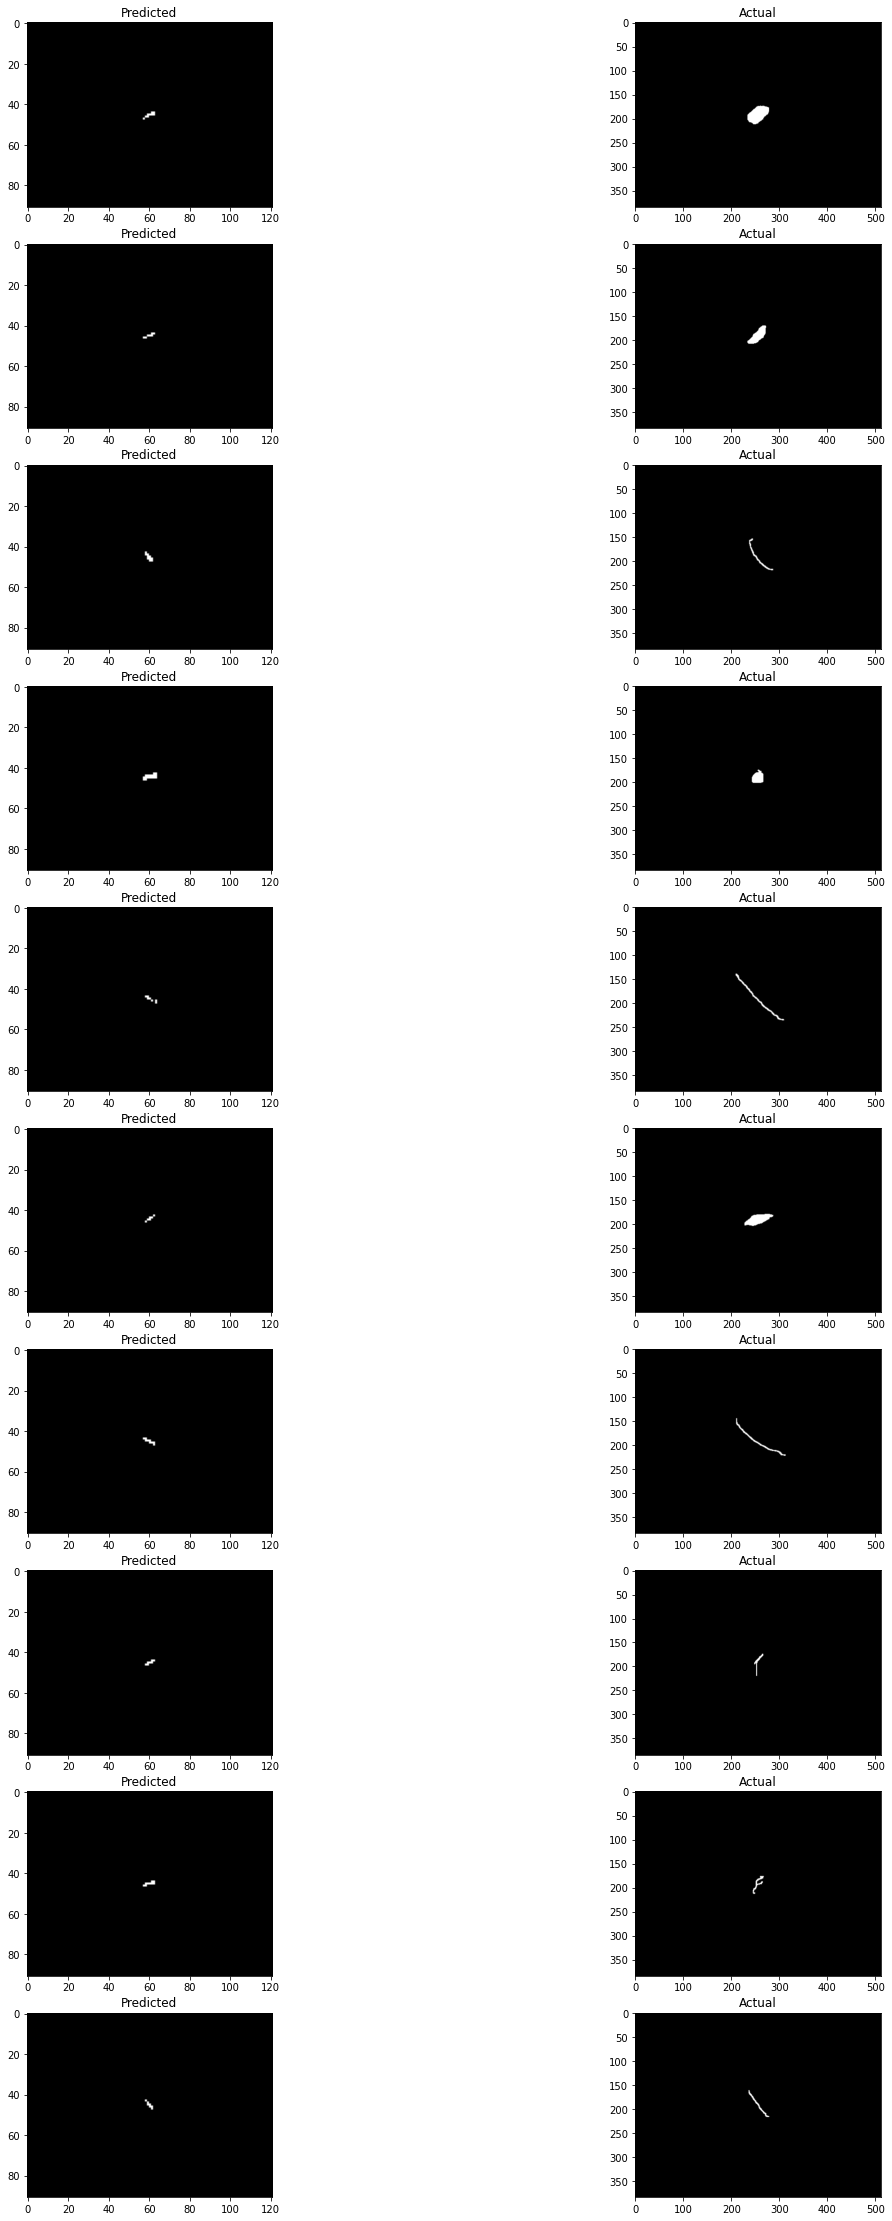

In [41]:
import random
from pulse2percept.utils import center_image
fig, axes = plt.subplots(10, 2, figsize=(20, 40))
preds = estimator.predict(x)
for plt_idx, img_idx in enumerate(random.sample([i for i in range(len(x))], 10)):
    axes[plt_idx, 0].imshow(center_image(preds[img_idx] > 1), cmap="gray")
    axes[plt_idx, 0].set_title("Predicted")
    axes[plt_idx, 1].imshow(center_image(y[img_idx]), cmap='gray')
    axes[plt_idx, 1].set_title("Actual")
fig.show()